In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_kddcup99
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(42)


In [ ]:
data = fetch_kddcup99()
D = pd.DataFrame(data['data'], columns=data['feature_names'])

In [ ]:
columns_to_encode = D.columns[1:4]
D_encoded = pd.get_dummies(D, columns=columns_to_encode).astype(int)

In [ ]:
D = D_encoded.to_numpy()
n, d = D.shape
print(f"Number of samples (n): {n}, Number of features (d): {d}")

Number of samples (n): 494021, Number of features (d): 118


In [ ]:
y = data['target']
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
def create_jl_matrix(d, target_dim):
    return np.random.normal(0, 1, (d, target_dim)) / np.sqrt(target_dim)

In [ ]:
def create_sparse_jl_matrix(rows, cols, sparsity=3):
    M = np.zeros((rows, cols))
    for i in range(cols):
        non_zero_indices = np.random.choice(rows, size=sparsity, replace=False)
        M[non_zero_indices, i] = np.random.choice([-1, 1], size=sparsity)
    return M / np.sqrt(rows)

In [ ]:
def compute_kmeans_loss(data, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    return kmeans.inertia_

In [ ]:
def compute_linear_regression_loss(X, y, coef):
    predictions = X @ coef.T
    return mean_squared_error(y, predictions)


In [ ]:
target_dim = 20
k = 15
loss_results = []

In [ ]:
for experiment in range(5):
    M = create_jl_matrix(d, target_dim)

    E = D @ M

    loss_A = compute_kmeans_loss(E, k)
    loss_B = compute_kmeans_loss(D, k)

    loss_results.append((loss_A, loss_B))
    print(f"Experiment {experiment + 1}: Loss (DM) = {loss_A}, Loss (D) = {loss_B}")

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Experiment 1: Loss (DM) = 2403350993427.7593, Loss (D) = 3231460464214.2817


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Experiment 2: Loss (DM) = 2892746278964.188, Loss (D) = 3231460464214.283


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Experiment 3: Loss (DM) = 3586750027769.364, Loss (D) = 3231460464214.282


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Experiment 4: Loss (DM) = 2525666207573.271, Loss (D) = 3231460464214.2817


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Experiment 5: Loss (DM) = 2837933970504.2373, Loss (D) = 3231460464214.2827


In [ ]:
loss_results = np.array(loss_results)
labels = [f"Exp {i + 1}" for i in range(5)]
x = np.arange(len(labels))
width = 0.35

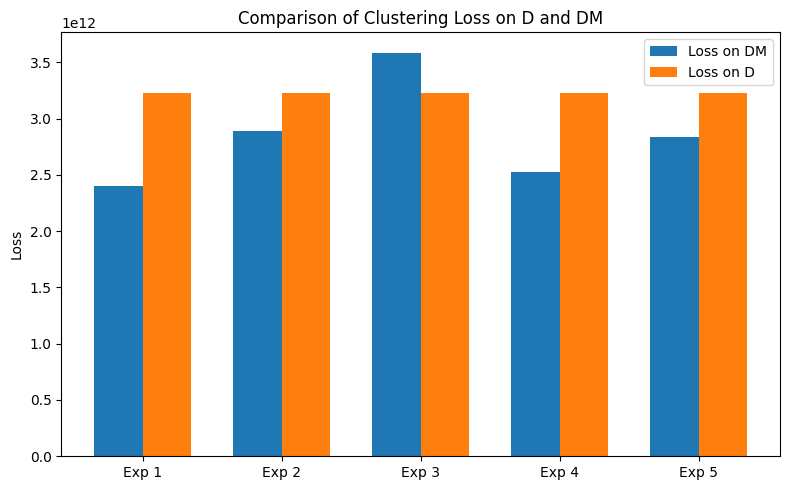

In [ ]:

fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(x - width / 2, loss_results[:, 0], width, label="Loss on DM")
ax.bar(x + width / 2, loss_results[:, 1], width, label="Loss on D")

ax.set_ylabel("Loss")
ax.set_title("Comparison of Clustering Loss on D and DM")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
results = []
rows = 10

In [ ]:
for experiment in range(5):
    M = create_sparse_jl_matrix(rows, d)
    E = M @ D.T
    model_a = LinearRegression()
    model_a.fit(E.T, y_encoded)
    a = model_a.coef_

    model_b = LinearRegression()
    model_b.fit(D, y_encoded)
    b = model_b.coef_

    predictions_a = E.T @ a
    predictions_b = D @ b

    loss_a = mean_squared_error(y_encoded, predictions_a)
    loss_b = mean_squared_error(y_encoded, predictions_b)

    results.append((loss_a, loss_b))
    print(f"Experiment {experiment + 1}: Loss (a) = {loss_a}, Loss (b) = {loss_b}")

Experiment 1: Loss (a) = 139.84780206995083, Loss (b) = 95.76407952683539
Experiment 2: Loss (a) = 130.74935035757042, Loss (b) = 95.76407952683539
Experiment 3: Loss (a) = 172.50225186951695, Loss (b) = 95.76407952683539
Experiment 4: Loss (a) = 123.59403689983168, Loss (b) = 95.76407952683539
Experiment 5: Loss (a) = 100.06095502993911, Loss (b) = 95.76407952683539


In [ ]:
results = np.array(results)
labels = [f"Exp {i + 1}" for i in range(5)]
x = np.arange(len(labels))
width = 0.35


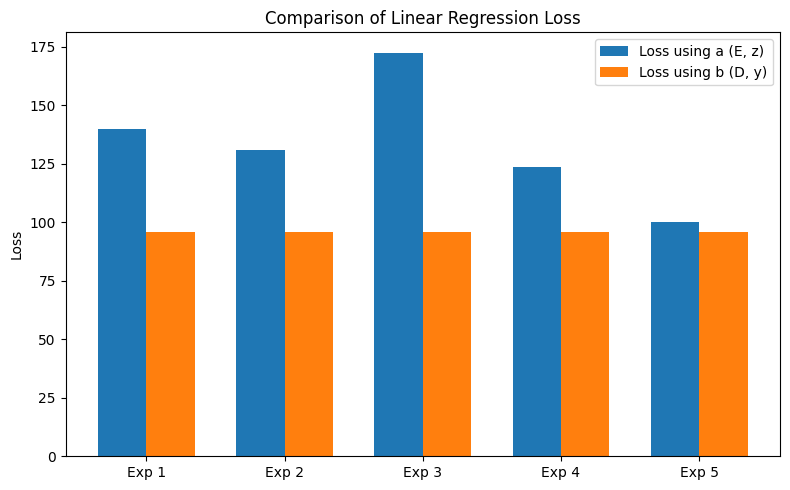

In [ ]:

fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(x - width / 2, results[:, 0], width, label="Loss using a (E, z)")
ax.bar(x + width / 2, results[:, 1], width, label="Loss using b (D, y)")

ax.set_ylabel("Loss")
ax.set_title("Comparison of Linear Regression Loss")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
# import numpy as np
# import pandas as pd
# from sklearn.datasets import fetch_kddcup99
# from sklearn.cluster import KMeans
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error
# from sklearn.preprocessing import LabelEncoder
# import matplotlib.pyplot as plt

# # Set random seed for reproducibility
# np.random.seed(42)

# # Load the KDD Cup 99 dataset
# data = fetch_kddcup99()
# D = pd.DataFrame(data['data'], columns=data['feature_names'])

# # One-hot encode the categorical features
# columns_to_encode = D.columns[1:4]
# D_encoded = pd.get_dummies(D, columns=columns_to_encode).astype(int)

# # Extract numerical matrix and dimensions
# D = D_encoded.to_numpy()
# n, d = D.shape
# print(f"Number of samples (n): {n}, Number of features (d): {d}")

# # Encode the target labels
# y = data['target']
# label_encoder = LabelEncoder()
# y_encoded = label_encoder.fit_transform(y)

# # Create a dense JL matrix
# def create_jl_matrix(d, target_dim):
#     """Create a dense JL matrix with Gaussian random entries."""
#     return np.random.normal(0, 1, (d, target_dim)) / np.sqrt(target_dim)

# # Create a sparse JL matrix
# def create_sparse_jl_matrix(rows, cols, sparsity=3):
#     """Create a sparse JL matrix."""
#     M = np.zeros((rows, cols))
#     for i in range(cols):
#         non_zero_indices = np.random.choice(rows, size=sparsity, replace=False)
#         M[non_zero_indices, i] = np.random.choice([-1, 1], size=sparsity)
#     return M / np.sqrt(rows)

# # Compute k-means clustering loss
# def compute_kmeans_loss(data, k):
#     """Compute k-means clustering loss."""
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     kmeans.fit(data)
#     return kmeans.inertia_

# # Linear regression and loss computation
# def compute_linear_regression_loss(X, y, coef):
#     """Compute linear regression loss."""
#     predictions = X @ coef.T
#     return mean_squared_error(y, predictions)

# # Part (a): K-means clustering with JL
# target_dim = 20
# k = 15
# loss_results = []

# for experiment in range(5):
#     # Create a JL matrix
#     M = create_jl_matrix(d, target_dim)

#     # Map the data
#     E = D @ M

#     # Compute clustering loss for transformed and original data
#     loss_A = compute_kmeans_loss(E, k)
#     loss_B = compute_kmeans_loss(D, k)

#     loss_results.append((loss_A, loss_B))
#     print(f"Experiment {experiment + 1}: Loss (DM) = {loss_A}, Loss (D) = {loss_B}")

# # Plot clustering loss results
# loss_results = np.array(loss_results)
# labels = [f"Exp {i + 1}" for i in range(5)]
# x = np.arange(len(labels))
# width = 0.35

# fig, ax = plt.subplots(figsize=(8, 5))
# ax.bar(x - width / 2, loss_results[:, 0], width, label="Loss on DM")
# ax.bar(x + width / 2, loss_results[:, 1], width, label="Loss on D")

# ax.set_ylabel("Loss")
# ax.set_title("Comparison of Clustering Loss on D and DM")
# ax.set_xticks(x)
# ax.set_xticklabels(labels)
# ax.legend()

# plt.tight_layout()
# plt.show()

# # Part (b): Linear regression with sparse JL
# results = []
# rows = 10  # Target dimension

# for experiment in range(5):
#     # Create a sparse JL matrix
#     M = create_sparse_jl_matrix(rows, d)  # M: 10 × 118

#     # Map the data using the JL matrix
#     E = M @ D.T  # Shape: (10, 494021)

#     # Fit linear regression on transformed data (E.T) and original data (D)
#     model_a = LinearRegression()
#     model_a.fit(E.T, y_encoded)  # Transposed to match sample-wise regression
#     a = model_a.coef_

#     model_b = LinearRegression()
#     model_b.fit(D, y_encoded)
#     b = model_b.coef_

#     # Compute regression loss
#     predictions_a = E.T @ a  # Predictions using transformed features
#     predictions_b = D @ b    # Predictions using original features

#     loss_a = mean_squared_error(y_encoded, predictions_a)
#     loss_b = mean_squared_error(y_encoded, predictions_b)

#     results.append((loss_a, loss_b))
#     print(f"Experiment {experiment + 1}: Loss (a) = {loss_a}, Loss (b) = {loss_b}")


# # Plot regression loss results
# results = np.array(results)
# labels = [f"Exp {i + 1}" for i in range(5)]
# x = np.arange(len(labels))
# width = 0.35

# fig, ax = plt.subplots(figsize=(8, 5))
# ax.bar(x - width / 2, results[:, 0], width, label="Loss using a (E, z)")
# ax.bar(x + width / 2, results[:, 1], width, label="Loss using b (D, y)")

# ax.set_ylabel("Loss")
# ax.set_title("Comparison of Linear Regression Loss")
# ax.set_xticks(x)
# ax.set_xticklabels(labels)
# ax.legend()

# plt.tight_layout()
# plt.show()
